In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

# 모듈로딩

In [197]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets.boston_housing import load_data
import numpy as np

# [1] 데이터로딩

In [198]:
# 학습용, 테스트용 = 8:2
(x_train, y_train),(x_test,y_test) = load_data()  

In [199]:
x_train.shape,x_test.shape 

((404, 13), (102, 13))

In [200]:
x_train[:1],y_train[0]

(array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
          91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
          18.72   ]]), 15.2)

### [1-1] 전처리
---
    특성(Feature) 전처리
      - 수치 데이터: 값의 범위
      - 문자 데이터: 수치화


In [201]:
# 스케일러 모듈 로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [202]:
scaler = StandardScaler()

In [203]:
scaler.fit(x_train)

StandardScaler()

In [204]:
scaler.mean_, scaler.scale_

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [205]:
x_train_scaled = scaler.transform(x_train)

# [2] NN Model 실습
---
- (1) 모델 구상
- (2) 모델 생성
- (3) 학습 
- (4) 평가
- (5) 테스트

##### [2-1] 모델 구상
- 입력 데이터 => 13개 features
- 출력 데이터 => 1개 집값
- 학습 방법   => 회귀 분류

Dense Layer : node=1,  
af = linear,  
input_shape = (13,)

In [206]:
# NN Model의 Layer를 층층이 담아서 관리하는 객체
model = Sequential(name = 'Boston')

In [207]:
# Layer 추가
model.add(Dense(10,activation='relu',input_shape=(13,), name ='input'))
model.add(Dense(30,activation='relu',name = 'hidden-1'))

# 과적합을 해결하기 위해서 Dropout() 사용, 지정된 비율만큼 node를 비활성화
model.add(Dropout(0.5)) 
model.add(Dense(30,activation='relu',name = 'hidden-2'))

# 회귀 => 출력층
model.add(Dense(1,activation='linear', name = 'output'))

In [208]:
model.summary()

Model: "Boston"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                140       
                                                                 
 hidden-1 (Dense)            (None, 30)                330       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 hidden-2 (Dense)            (None, 30)                930       
                                                                 
 output (Dense)              (None, 1)                 31        
                                                                 
Total params: 1,431
Trainable params: 1,431
Non-trainable params: 0
_________________________________________________________________


#### [2-2] 모델 생성
---
#### Sequential 클래스의 compile 메서드
    - 모델이 동작하기 위해서 필요한 설정
    1. 오차 계산 함수 설정 = loss
                     
    2. W, B 최적화 방식 설정 => optimizer
  
    3. 모델의 성능 측정 항목 설정 => metrics
      * 파라미터 값들
        - str 타입으로 입력 가능
        - 객체 타입으로 입력 가능

#### 오차/로스 계산함수 loss param
    - 회귀 -> mae, mse, rmse
    - 분류 -> crossentropy 
        - 이진분류: binary_crossentropy
        - 다중분류: categorical_crossentropy(target 원핫인코딩 시), sparse_categorical_crossentropy  

#### 최적화
    - 기본: rmsprop
    - adam, momonent,... 최적화 클래스 이름 문자열 입력  


In [209]:
model.compile(loss = 'mse', optimizer = 'adam',metrics = ['accuracy','mae'])

#### [2-3]학습
---
    - fit() 메서드
      * 파라미터
      * 반환값 => History 객체

     - epochs =1 : 처음~끝까지 학습 횟수
     - batch_size = 32: 학습량 크기
     - validation_split = 학습 데이터의 일부를 검증용으로 분리 0.0~0.1
     - validation_data =  테스트데이터, 테스트 타겟
     - callbacks =학습 시 발생하는 이벤트 처리 함수 등록

#### 반환값


In [210]:
from tensorflow.keras.callbacks import EarlyStopping

# 검증 데이터에 대한 loss값 3번 연속 개선되지 않으면 개선 중지
stopCB = EarlyStopping(monitor = 'val_loss', patience = 3) 

In [211]:
result = model.fit(x_train,y_train, 
                   epochs=10, 
                   batch_size=10,
                   validation_data=(x_test,y_test),
                   callbacks=[stopCB])

Epoch 1/10
41/41 [==============================] - 1s 14ms/step - loss: 4181.4805 - accuracy: 0.0000e+00 - mae: 48.4278 - val_loss: 344.5915 - val_accuracy: 0.0000e+00 - val_mae: 13.5516
Epoch 2/10
41/41 [==============================] - 0s 3ms/step - loss: 1124.6312 - accuracy: 0.0000e+00 - mae: 25.1128 - val_loss: 225.8047 - val_accuracy: 0.0000e+00 - val_mae: 12.3895
Epoch 3/10
41/41 [==============================] - 0s 3ms/step - loss: 531.1054 - accuracy: 0.0000e+00 - mae: 17.7765 - val_loss: 130.4842 - val_accuracy: 0.0000e+00 - val_mae: 8.6502
Epoch 4/10
41/41 [==============================] - 0s 3ms/step - loss: 390.8084 - accuracy: 0.0000e+00 - mae: 15.0497 - val_loss: 92.5272 - val_accuracy: 0.0000e+00 - val_mae: 6.8278
Epoch 5/10
41/41 [==============================] - 0s 4ms/step - loss: 263.1918 - accuracy: 0.0000e+00 - mae: 12.3872 - val_loss: 106.8075 - val_accuracy: 0.0000e+00 - val_mae: 7.4818
Epoch 6/10
41/41 [==============================] - 0s 3ms/step - loss:

In [212]:
type(result), result.history, result.params

(keras.callbacks.History,
 {'loss': [4181.48046875,
   1124.6312255859375,
   531.1054077148438,
   390.80841064453125,
   263.1918029785156,
   258.6507263183594,
   230.83680725097656],
  'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'mae': [48.42775344848633,
   25.112817764282227,
   17.77645492553711,
   15.049697875976562,
   12.387211799621582,
   11.885605812072754,
   11.594433784484863],
  'val_loss': [344.5915222167969,
   225.80467224121094,
   130.4841766357422,
   92.52722930908203,
   106.80745697021484,
   107.47689056396484,
   116.74905395507812],
  'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'val_mae': [13.551593780517578,
   12.389525413513184,
   8.650215148925781,
   6.827757358551025,
   7.481778144836426,
   7.577253341674805,
   8.003703117370605]},
 {'verbose': 1, 'epochs': 10, 'steps': 41})

In [213]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'mae', 'val_loss', 'val_accuracy', 'val_mae'])

In [214]:
# keys로 값 확인 -> 객체.history[keyname]
result.history['loss']

[4181.48046875,
 1124.6312255859375,
 531.1054077148438,
 390.80841064453125,
 263.1918029785156,
 258.6507263183594,
 230.83680725097656]

In [215]:
result.history['accuracy']

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [216]:
import matplotlib.pyplot as plt

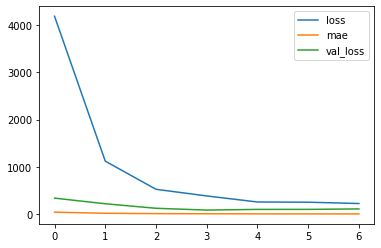

In [217]:
plt.plot(result.epoch, result.history['loss'], label='loss')
plt.plot(result.epoch, result.history['mae'], label='mae' )
plt.plot(result.epoch, result.history['val_loss'], label='val_loss' )
plt.legend()
plt.show()

#### [2-4] 평가
---
    [ evaluate()메서드 ]
    - 파라미터 : test_data,test_target
    - 반환값 : loss, complie()의 metrics에서 설정한 항목값

In [218]:
eRet = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 116.7491 - accuracy: 0.0000e+00 - mae: 8.0037


In [219]:
eRet

[116.74905395507812, 0.0, 8.003702163696289]

#### [2-5] 예측
  - predict()

In [220]:
model.predict(x_train[:1])

array([[16.191935]], dtype=float32)